In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.io.fits as fits

In [2]:
# the function for cutting pulses from light curve
def cutting(time, rate, period, binsize, start, number, show='no', left=0, right=10000):
    # all the needed lists:
    I = [] # mean intensity for each pulse
    r = [] # rate, divided by pulses
    t_start = [] # time boundaries of each pulse
    t_stop = []
    
    # in case I need to see what's going on
    if show == 'show' or show == 'save':
            fig = plt.figure(figsize=(14,7))
            plt.title('Light curve with normalization for each pulse', fontsize=18)
            plt.xlabel('Time, s', fontsize=16)
            plt.ylabel('Count rate, normalized units', fontsize=16)
            plt.xlim(left, right)
            plt.gca().tick_params(labelsize=14)
    
    # the main cutting process
    for i in range(number):
        stop = start + period / binsize # define the time interval for one pulse
        I.append(np.nanmean(rate[round(start):round(stop)])) # calculate mean intensity for the pulse
        r.append(rate[round(start):round(stop)])
        t_start.append(time[round(start)]) # add time boundaries
        t_stop.append(time[round(stop)])
        
        if show == 'show' or show == 'save':
            plt.plot(time[round(start):round(stop)], rate[round(start):round(stop)] / I[i], c='#1f77b4')
            
        start = stop
        
    if show == 'save':
        plt.savefig('lc normed ' + str(left)[:4] + '.png', dpi=250)
    elif show == 'show':
        plt.show()
    
    return I, r, start, t_start, t_stop

In [3]:
# the function for making pulse profile
def efoldin(I_all, rate, int_min=0, int_max=100000, bins=36):
    # preparing bins
    x = np.linspace(0, 0.97222222, bins)
    bin_len = len(rate[0]) / bins
    rate_profile = np.zeros(bins)
    num = 0
    
    for i in range(len(I_all)):
        if (I_all[i] > int_min) & (I_all[i] < int_max):
            for k in range(bins):
                rate_profile[k] += np.mean(rate[i][round(k * bin_len):round((k+1) * bin_len)])
            num += 1
    rate_profile /= num
    return x, rate_profile, np.mean(rate_profile), num

In [4]:
lc = fits.open('AB01_sr.lc') # this light curve is made from two: lcA + lcB (not normalized)

In [5]:
time = lc[1].data.TIME
rate = lc[1].data.RATE

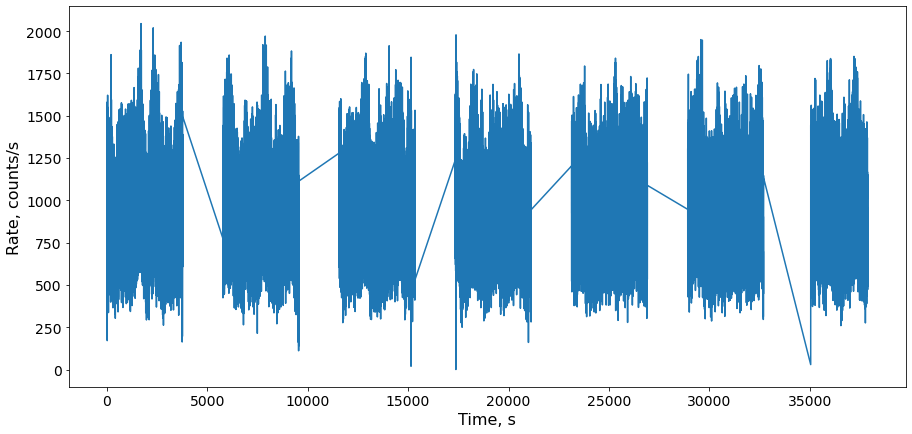

In [6]:
plt.figure(figsize=(15,7))
plt.xlabel('Time, s', fontsize=16)
plt.ylabel('Rate, counts/s', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.plot(time, rate)
# plt.xlim(-1000, 39000)
# plt.ylim(400, 1600)
plt.show()

In [7]:
# making mask to see where the empty spaces are
time[np.where(np.diff(time) > 0.15)[0]]

array([2.52000e+01, 2.58000e+01, 3.58110e+03, 3.58170e+03, 3.63310e+03,
       3.63370e+03, 3.64210e+03, 3.64270e+03, 3.73210e+03, 3.73270e+03,
       3.74310e+03, 3.74370e+03, 3.74610e+03, 3.74650e+03, 3.75010e+03,
       3.75070e+03, 3.75210e+03, 3.75450e+03, 3.75710e+03, 3.75750e+03,
       3.75910e+03, 3.76210e+03, 3.76310e+03, 3.76610e+03, 3.77810e+03,
       5.77960e+03, 5.92400e+03, 6.01300e+03, 9.36090e+03, 9.36170e+03,
       9.36230e+03, 9.36590e+03, 9.36670e+03, 9.36890e+03, 9.36970e+03,
       9.41790e+03, 9.41850e+03, 9.42590e+03, 9.42670e+03, 9.52290e+03,
       9.52350e+03, 9.52990e+03, 9.53030e+03, 9.53390e+03, 9.53430e+03,
       9.53590e+03, 9.53650e+03, 9.54390e+03, 9.54450e+03, 9.54890e+03,
       9.55090e+03, 9.55250e+03, 9.55390e+03, 9.55470e+03, 9.55550e+03,
       9.55650e+03, 9.55750e+03, 9.56090e+03, 1.15632e+04, 1.29198e+04,
       1.29248e+04, 1.29278e+04, 1.29298e+04, 1.41887e+04, 1.41967e+04,
       1.42007e+04, 1.42167e+04, 1.42927e+04, 1.42987e+04, 1.431

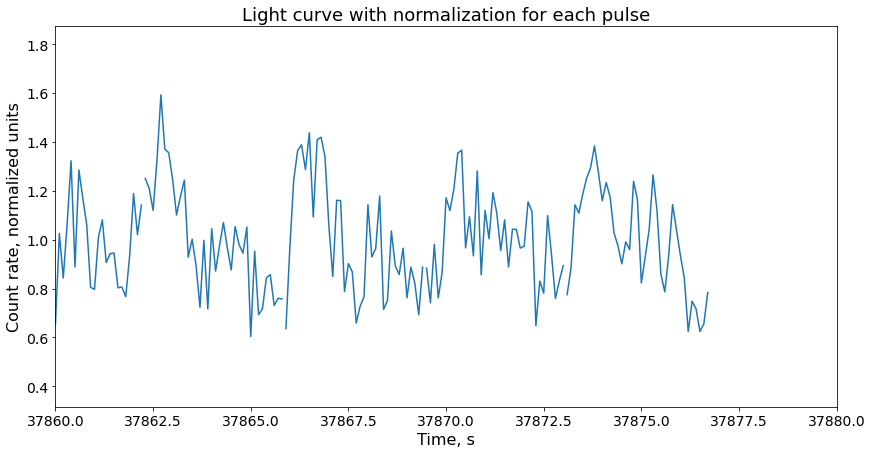

253597.59999999835

In [8]:
# example of using cutting function
cutting(time, rate, period=3.615, binsize=0.1, start=243331, number=284, left=37860, right=37880, show='show')[2]

In [9]:
# collecting intensities of individual pulses
I = cutting(time, rate, period=3.615, binsize=0.1, start=31, number=6, left=0, right=30)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=280, number=300, left=1100, right=1120)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=11125, number=300, left=2180, right=2200)[0]
I += cutting(time, rate, period=3.614, binsize=0.1, start=21970, number=225, left=3000, right=3020)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=30101, number=157, left=3570, right=3590)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=35843, number=13, left=3620, right=3640)[0]
I += cutting(time, rate, period=3.613, binsize=0.1, start=36452, number=23, left=3720, right=3740)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=37564, number=39, left=5920, right=5940)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=39004, number=23, left=6000, right=6020)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=39867, number=300, left=7100, right=7120)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=50713, number=193, left=7780, right=7800)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=57831, number=427, left=9340, right=9360)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=75205, number=374, left=12900, right=12920)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=88793, number=346, left=14160, right=14180)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=102471, number=220, left=15140, right=15160)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=110976, number=29, left=15300, right=15320)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=112638, number=300, left=18440, right=18460)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=123482, number=500, left=20260, right=20280)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=141557, number=198, left=20980, right=21000)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=150286, number=500, left=24960, right=24980)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=168393, number=128, left=25420, right=25440)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=173147, number=379, left=26820, right=26840)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=187902, number=500, left=30740, right=30760)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=205977, number=510, left=32600, right=32620)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=225257, number=500, left=36840, right=36860)[0]
I += cutting(time, rate, period=3.615, binsize=0.1, start=243331, number=284, left=37860, right=37880)[0]
I = np.array(I)

In [10]:
# the same with their start and stop time. will be needed for making GTI files
t_start = cutting(time, rate, period=3.615, binsize=0.1, start=31, number=6, left=0, right=30)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=280, number=300, left=1100, right=1120)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=11125, number=300, left=2180, right=2200)[3]
t_start += cutting(time, rate, period=3.614, binsize=0.1, start=21970, number=225, left=3000, right=3020)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=30101, number=157, left=3570, right=3590)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=35843, number=13, left=3620, right=3640)[3]
t_start += cutting(time, rate, period=3.613, binsize=0.1, start=36452, number=23, left=3720, right=3740)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=37564, number=39, left=5920, right=5940)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=39004, number=23, left=6000, right=6020)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=39867, number=300, left=7100, right=7120)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=50713, number=193, left=7780, right=7800)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=57831, number=427, left=9340, right=9360)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=75205, number=374, left=12900, right=12920)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=88793, number=346, left=14160, right=14180)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=102471, number=220, left=15140, right=15160)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=110976, number=29, left=15300, right=15320)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=112638, number=300, left=18440, right=18460)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=123482, number=500, left=20260, right=20280)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=141557, number=198, left=20980, right=21000)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=150286, number=500, left=24960, right=24980)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=168393, number=128, left=25420, right=25440)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=173147, number=379, left=26820, right=26840)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=187902, number=500, left=30740, right=30760)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=205977, number=510, left=32600, right=32620)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=225257, number=500, left=36840, right=36860)[3]
t_start += cutting(time, rate, period=3.615, binsize=0.1, start=243331, number=284, left=37860, right=37880)[3]
t_start = np.array(t_start)

In [11]:
t_stop = cutting(time, rate, period=3.615, binsize=0.1, start=31, number=6, left=0, right=30)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=280, number=300, left=1100, right=1120)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=11125, number=300, left=2180, right=2200)[4]
t_stop += cutting(time, rate, period=3.614, binsize=0.1, start=21970, number=225, left=3000, right=3020)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=30101, number=157, left=3570, right=3590)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=35843, number=13, left=3620, right=3640)[4]
t_stop += cutting(time, rate, period=3.613, binsize=0.1, start=36452, number=23, left=3720, right=3740)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=37564, number=39, left=5920, right=5940)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=39004, number=23, left=6000, right=6020)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=39867, number=300, left=7100, right=7120)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=50713, number=193, left=7780, right=7800)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=57831, number=427, left=9340, right=9360)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=75205, number=374, left=12900, right=12920)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=88793, number=346, left=14160, right=14180)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=102471, number=220, left=15140, right=15160)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=110976, number=29, left=15300, right=15320)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=112638, number=300, left=18440, right=18460)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=123482, number=500, left=20260, right=20280)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=141557, number=198, left=20980, right=21000)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=150286, number=500, left=24960, right=24980)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=168393, number=128, left=25420, right=25440)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=173147, number=379, left=26820, right=26840)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=187902, number=500, left=30740, right=30760)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=205977, number=510, left=32600, right=32620)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=225257, number=500, left=36840, right=36860)[4]
t_stop += cutting(time, rate, period=3.615, binsize=0.1, start=243331, number=284, left=37860, right=37880)[4]
t_stop = np.array(t_stop)

In [12]:
# how many pulses we've got
I.shape

(6774,)

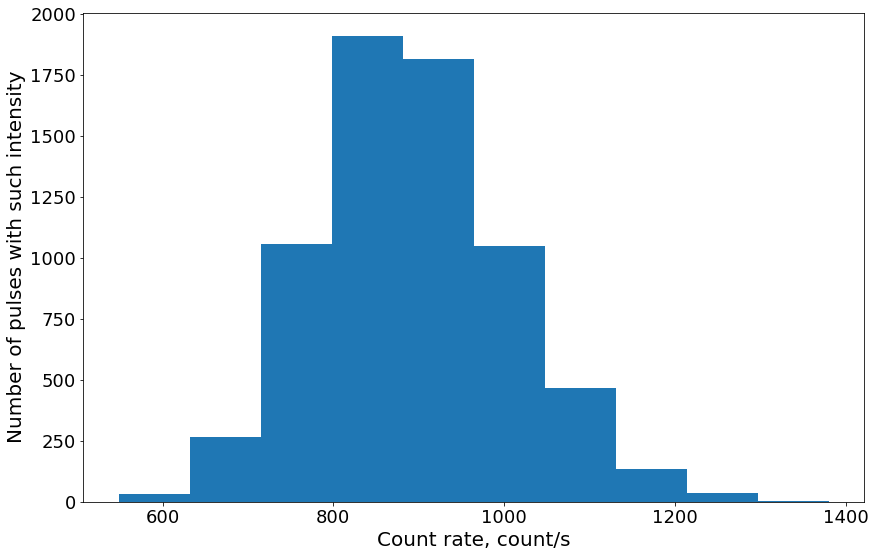

In [13]:
fig = plt.figure(figsize=(14,9))
plt.xlabel('Count rate, count/s', fontsize=20)
plt.ylabel('Number of pulses with such intensity', fontsize=20)
plt.hist(I, 10)
ax = plt.gca()
ax.tick_params(labelsize=18)
plt.show()

## Defining 4 groups of pulses by their intensity

In [14]:
def percentile(a):
    b = np.sort(np.array(a))
    perc = []
    for i in b:
        perc.append(np.sum(np.where(b >= i, 1, 0)) / b.shape[0])
    return np.array(perc)

In [15]:
p = percentile(I)
I_sorted = np.sort(I)

In [16]:
p1 = (I_sorted[np.where(p >= 0.75)][0], I_sorted[np.where(p >= 0.75)][-1])
p2 = (I_sorted[np.where((p >= 0.5) & (p < 0.75))][0], I_sorted[np.where((p >= 0.5) & (p < 0.75))][-1])
p3 = (I_sorted[np.where((p >= 0.25) & (p < 0.5))][0], I_sorted[np.where((p >= 0.25) & (p < 0.5))][-1])
p4 = (I_sorted[np.where(p < 0.25)][0], I_sorted[np.where(p < 0.25)][-1])
p1 # <- the first intensity interval

(548.57825, 814.3377)

## Making GTI files

In [17]:
# choosing pulses
t_start1 = t_start[I < 814.33]
t_stop1 = t_stop[I < 814.33]

# checking quantity. each group should contain about 1693-1694 pulses
t_start1.shape

(1693,)

In [18]:
# combining adjacent periods into one time interval
i_start1 = np.where(t_start1[1:] != t_stop1[:-1])[0] + 1
i_stop1 = np.where(t_start1[1:] != t_stop1[:-1])[0]

In [19]:
# adding the first start time and the last stop time
start1 = np.insert(t_start1[i_start1], 0, t_start1[0])
stop1 = np.append(t_stop1[i_stop1], t_stop1[-1])

In [20]:
# final arrays
start1[:10], stop1[:10]

(array([129.60000002, 147.69999999, 165.80000001, 180.19999999,
        198.30000001, 267.        , 277.80000001, 285.10000002,
        295.89999998, 328.39999998]),
 array([136.89999998, 162.19999999, 169.39999998, 183.80000001,
        201.89999998, 274.19999999, 281.5       , 292.30000001,
        324.80000001, 339.30000001]))

In [21]:
# opening gti file to copy header from it
gtifile = fits.open('A01_gti.fits')

In [22]:
# making new gti file
c1 = fits.Column(name='START', format='1D', unit='s', array=start1)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stop1)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('gti1.fits', overwrite=True)

In [23]:
# updating headers
with fits.open('gti1.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lc[0].header['TELESCOP'], lc[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lc[0].header['INSTRUME'], lc[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lc[0].header['OBJECT'], lc[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lc[0].header['DATE-OBS'], lc[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lc[0].header['DATE-END'], lc[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lc[0].header['TSTART'], lc[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lc[0].header['TSTOP'], lc[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lc[0].header['MJD-OBS'], lc[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lc[0].header['MJDREFI'], lc[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lc[0].header['MJDREFF'], lc[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lc[0].header['TIMEREF'], lc[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lc[0].header['TIMESYS'], lc[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lc[0].header['TIMEUNIT'], lc[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lc[0].header['TIMEDEL'], lc[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lc[2].header['TELESCOP'], lc[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lc[2].header['INSTRUME'], lc[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lc[2].header['OBJECT'], lc[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lc[2].header['DATE-OBS'], lc[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lc[2].header['DATE-END'], lc[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lc[2].header['TSTART'], lc[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lc[2].header['TSTOP'], lc[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lc[2].header['MJD-OBS'], lc[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lc[2].header['MJDREFI'], lc[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lc[2].header['MJDREFF'], lc[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lc[2].header['TIMEREF'], lc[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lc[2].header['TIMESYS'], lc[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lc[2].header['TIMEUNIT'], lc[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lc[1].header['TIMEZERO'], lc[1].header.comments['TIMEZERO'])

In [24]:
# checking the result
gti1 = fits.open('gti1.fits')
gti1[1].data[:10]

FITS_rec([(129.60000002, 136.89999998), (147.69999999, 162.19999999),
          (165.80000001, 169.39999998), (180.19999999, 183.80000001),
          (198.30000001, 201.89999998), (267.        , 274.19999999),
          (277.80000001, 281.5       ), (285.10000002, 292.30000001),
          (295.89999998, 324.80000001), (328.39999998, 339.30000001)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [25]:
p2

(814.34235, 885.4662)

In [26]:
t_start2 = t_start[(I >= 814.33) & (I < 885.46)]
t_stop2 = t_stop[(I >= 814.33) & (I < 885.46)]
t_start2.shape

(1694,)

In [27]:
i_start2 = np.where(t_start2[1:] != t_stop2[:-1])[0] + 1
i_stop2 = np.where(t_start2[1:] != t_stop2[:-1])[0]

start2 = np.insert(t_start2[i_start2], 0, t_start2[0])
stop2 = np.append(t_stop2[i_stop2], t_stop2[-1])

In [28]:
start2[:10], stop2[:10]

(array([ 82.60000002, 107.89999998, 136.89999998, 144.10000002,
        162.19999999, 169.39999998, 176.60000002, 183.80000001,
        209.19999999, 220.        ]),
 array([ 97.10000002, 122.39999998, 140.5       , 147.69999999,
        165.80000001, 173.        , 180.19999999, 187.5       ,
        212.80000001, 223.60000002]))

In [29]:
c1 = fits.Column(name='START', format='1D', unit='s', array=start2)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stop2)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('gti2.fits', overwrite=True)

In [30]:
with fits.open('gti2.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lc[0].header['TELESCOP'], lc[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lc[0].header['INSTRUME'], lc[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lc[0].header['OBJECT'], lc[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lc[0].header['DATE-OBS'], lc[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lc[0].header['DATE-END'], lc[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lc[0].header['TSTART'], lc[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lc[0].header['TSTOP'], lc[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lc[0].header['MJD-OBS'], lc[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lc[0].header['MJDREFI'], lc[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lc[0].header['MJDREFF'], lc[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lc[0].header['TIMEREF'], lc[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lc[0].header['TIMESYS'], lc[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lc[0].header['TIMEUNIT'], lc[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lc[0].header['TIMEDEL'], lc[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lc[2].header['TELESCOP'], lc[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lc[2].header['INSTRUME'], lc[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lc[2].header['OBJECT'], lc[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lc[2].header['DATE-OBS'], lc[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lc[2].header['DATE-END'], lc[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lc[2].header['TSTART'], lc[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lc[2].header['TSTOP'], lc[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lc[2].header['MJD-OBS'], lc[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lc[2].header['MJDREFI'], lc[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lc[2].header['MJDREFF'], lc[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lc[2].header['TIMEREF'], lc[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lc[2].header['TIMESYS'], lc[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lc[2].header['TIMEUNIT'], lc[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lc[1].header['TIMEZERO'], lc[1].header.comments['TIMEZERO'])

In [31]:
gti2 = fits.open('gti2.fits')
gti2[1].data[:10]

FITS_rec([( 82.60000002,  97.10000002), (107.89999998, 122.39999998),
          (136.89999998, 140.5       ), (144.10000002, 147.69999999),
          (162.19999999, 165.80000001), (169.39999998, 173.        ),
          (176.60000002, 180.19999999), (183.80000001, 187.5       ),
          (209.19999999, 212.80000001), (220.        , 223.60000002)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [32]:
p3

(885.51587, 964.2073)

In [33]:
t_start3 = t_start[(I >= 885.46) & (I < 964.2)]
t_stop3 = t_stop[(I >= 885.46) & (I < 964.2)]
t_start3.shape

(1693,)

In [34]:
i_start3 = np.where(t_start3[1:] != t_stop3[:-1])[0] + 1
i_stop3 = np.where(t_start3[1:] != t_stop3[:-1])[0]

start3 = np.insert(t_start3[i_start3], 0, t_start3[0])
stop3 = np.append(t_stop3[i_stop3], t_stop3[-1])

start3[:10], stop3[:10]

(array([ 21.19999999,  28.39999998,  64.5       ,  75.39999998,
         97.10000002, 122.39999998, 140.5       , 187.5       ,
        201.89999998, 223.60000002]),
 array([ 24.80000001,  35.60000002,  71.80000001,  79.        ,
        107.89999998, 129.60000002, 144.10000002, 198.30000001,
        209.19999999, 230.80000001]))

In [35]:
c1 = fits.Column(name='START', format='1D', unit='s', array=start3)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stop3)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('gti3.fits', overwrite=True)

In [36]:
with fits.open('gti3.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lc[0].header['TELESCOP'], lc[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lc[0].header['INSTRUME'], lc[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lc[0].header['OBJECT'], lc[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lc[0].header['DATE-OBS'], lc[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lc[0].header['DATE-END'], lc[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lc[0].header['TSTART'], lc[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lc[0].header['TSTOP'], lc[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lc[0].header['MJD-OBS'], lc[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lc[0].header['MJDREFI'], lc[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lc[0].header['MJDREFF'], lc[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lc[0].header['TIMEREF'], lc[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lc[0].header['TIMESYS'], lc[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lc[0].header['TIMEUNIT'], lc[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lc[0].header['TIMEDEL'], lc[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lc[2].header['TELESCOP'], lc[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lc[2].header['INSTRUME'], lc[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lc[2].header['OBJECT'], lc[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lc[2].header['DATE-OBS'], lc[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lc[2].header['DATE-END'], lc[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lc[2].header['TSTART'], lc[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lc[2].header['TSTOP'], lc[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lc[2].header['MJD-OBS'], lc[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lc[2].header['MJDREFI'], lc[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lc[2].header['MJDREFF'], lc[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lc[2].header['TIMEREF'], lc[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lc[2].header['TIMESYS'], lc[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lc[2].header['TIMEUNIT'], lc[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lc[1].header['TIMEZERO'], lc[1].header.comments['TIMEZERO'])

In [37]:
p4

(964.30835, 1380.1052)

In [38]:
t_start4 = t_start[I >= 964.2]
t_stop4 = t_stop[I >= 964.2]
t_start4.shape

(1694,)

In [39]:
i_start4 = np.where(t_start4[1:] != t_stop4[:-1])[0] + 1
i_stop4 = np.where(t_start4[1:] != t_stop4[:-1])[0]

start4 = np.insert(t_start4[i_start4], 0, t_start4[0])
stop4 = np.append(t_stop4[i_stop4], t_stop4[-1])

start4[:10], stop4[:10]

(array([  3.10000002,  35.60000002,  71.80000001,  79.        ,
        173.        , 212.80000001, 230.80000001, 248.89999998,
        585.10000002, 599.60000002]),
 array([ 21.19999999,  64.5       ,  75.39999998,  82.60000002,
        176.60000002, 220.        , 238.10000002, 252.5       ,
        588.69999999, 603.19999999]))

In [40]:
c1 = fits.Column(name='START', format='1D', unit='s', array=start4)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stop4)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('gti4.fits', overwrite=True)

In [41]:
with fits.open('gti4.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lc[0].header['TELESCOP'], lc[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lc[0].header['INSTRUME'], lc[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lc[0].header['OBJECT'], lc[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lc[0].header['DATE-OBS'], lc[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lc[0].header['DATE-END'], lc[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lc[0].header['TSTART'], lc[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lc[0].header['TSTOP'], lc[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lc[0].header['MJD-OBS'], lc[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lc[0].header['MJDREFI'], lc[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lc[0].header['MJDREFF'], lc[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lc[0].header['TIMEREF'], lc[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lc[0].header['TIMESYS'], lc[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lc[0].header['TIMEUNIT'], lc[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lc[0].header['TIMEDEL'], lc[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lc[2].header['TELESCOP'], lc[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lc[2].header['INSTRUME'], lc[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lc[2].header['OBJECT'], lc[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lc[2].header['DATE-OBS'], lc[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lc[2].header['DATE-END'], lc[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lc[2].header['TSTART'], lc[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lc[2].header['TSTOP'], lc[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lc[2].header['MJD-OBS'], lc[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lc[2].header['MJDREFI'], lc[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lc[2].header['MJDREFF'], lc[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lc[2].header['TIMEREF'], lc[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lc[2].header['TIMESYS'], lc[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lc[2].header['TIMEUNIT'], lc[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lc[1].header['TIMEZERO'], lc[1].header.comments['TIMEZERO'])

# Pulse profile

In [42]:
# collecting rate values
r = cutting(time, rate, period=3.615, binsize=0.1, start=31, number=6, left=0, right=30)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=280, number=300, left=1100, right=1120)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=11125, number=300, left=2180, right=2200)[1]
r += cutting(time, rate, period=3.614, binsize=0.1, start=21970, number=225, left=3000, right=3020)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=30101, number=157, left=3570, right=3590)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=35843, number=13, left=3620, right=3640)[1]
r += cutting(time, rate, period=3.613, binsize=0.1, start=36452, number=23, left=3720, right=3740)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=37564, number=39, left=5920, right=5940)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=39004, number=23, left=6000, right=6020)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=39867, number=300, left=7100, right=7120)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=50713, number=193, left=7780, right=7800)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=57831, number=427, left=9340, right=9360)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=75205, number=374, left=12900, right=12920)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=88793, number=346, left=14160, right=14180)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=102471, number=220, left=15140, right=15160)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=110976, number=29, left=15300, right=15320)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=112638, number=300, left=18440, right=18460)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=123482, number=500, left=20260, right=20280)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=141557, number=198, left=20980, right=21000)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=150286, number=500, left=24960, right=24980)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=168393, number=128, left=25420, right=25440)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=173147, number=379, left=26820, right=26840)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=187902, number=500, left=30740, right=30760)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=205977, number=510, left=32600, right=32620)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=225257, number=500, left=36840, right=36860)[1]
r += cutting(time, rate, period=3.615, binsize=0.1, start=243331, number=284, left=37860, right=37880)[1]
#r = np.array(r)

In [43]:
x = np.linspace(0, 0.97222222, 36)

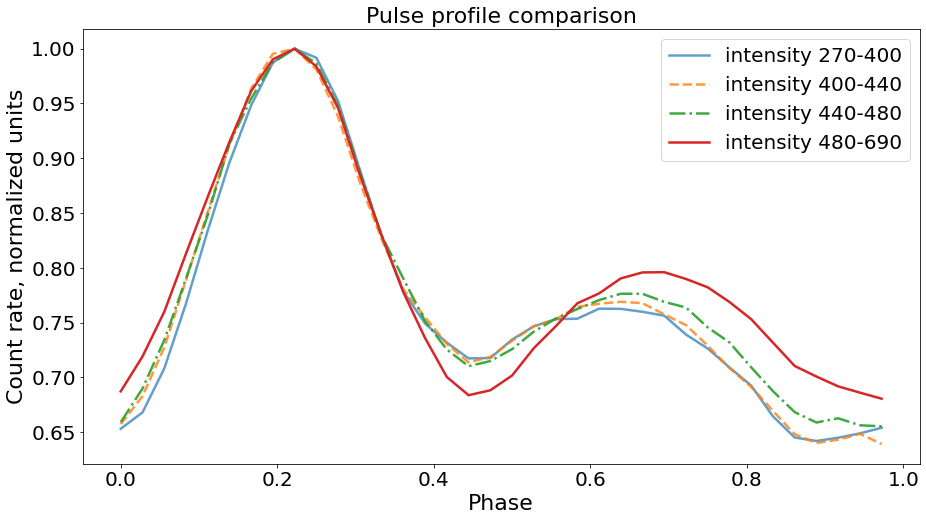

In [44]:
fig = plt.figure(figsize=(15, 8))
plt.title('Pulse profile comparison', fontsize=22)
plt.plot(x, 
         (efoldin(I, r, p1[0], p1[1], 36)[1] / efoldin(I, r, p1[0], p1[1], 36)[1][8]), # divide by peak value
         label='intensity 270-400', lw=2.5, alpha=0.7)                                 # to simplify the comparison
plt.plot(x, efoldin(I, r, p2[0], p2[1], 36)[1]/efoldin(I, r, p2[0], p2[1], 36)[1][8],
         label='intensity 400-440', lw=2.5, alpha=0.8, ls='--')
plt.plot(x, efoldin(I, r, p3[0], p3[1], 36)[1]/efoldin(I, r, p3[0], p3[1], 36)[1][8],
         label='intensity 440-480', lw=2.5, alpha=0.9, ls='-.')
plt.plot(x, efoldin(I, r, p4[0], p4[1], 36)[1]/efoldin(I, r, p4[0], p4[1], 36)[1][8],
         label='intensity 480-690', lw=2.5, alpha=1)
plt.xlabel('Phase', fontsize=22)
plt.ylabel('Count rate, normalized units', fontsize=22)
plt.legend(fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.show()

### Calculating pulsed fraction

In [45]:
prof1 = efoldin(I, r, p1[0], p1[1], 36)[1]
prof2 = efoldin(I, r, p2[0], p2[1], 36)[1]
prof3 = efoldin(I, r, p3[0], p3[1], 36)[1]
prof4 = efoldin(I, r, p4[0], p4[1], 36)[1]

In [46]:
pfrac = [(max(prof1) - min(prof1)) / (max(prof1) + min(prof1)), 
         (max(prof2) - min(prof2)) / (max(prof2) + min(prof2)),
         (max(prof3) - min(prof3)) / (max(prof3) + min(prof3)),
         (max(prof4) - min(prof4)) / (max(prof4) + min(prof4))]

In [47]:
intens = np.array([341, 425, 462, 586])

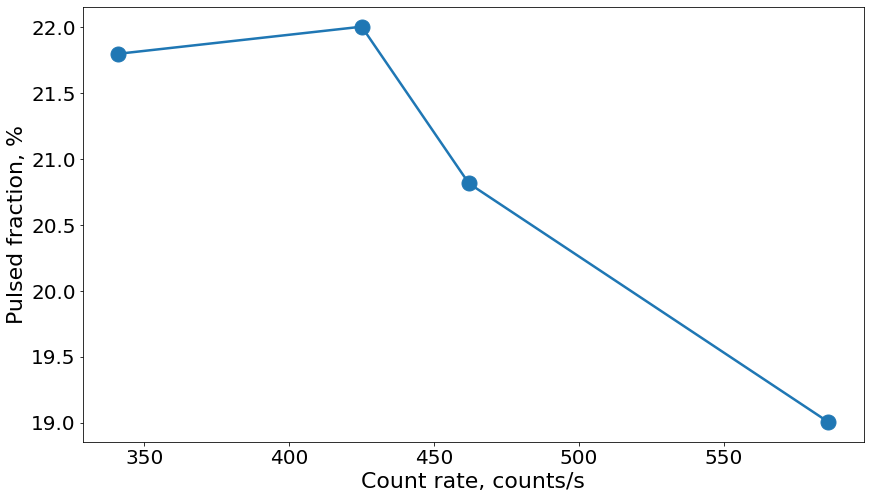

In [48]:
fig = plt.figure(figsize=(14, 8))
plt.plot(intens, np.array(pfrac)*100, 'o-', lw=2.5, ms=15)
plt.xlabel('Count rate, counts/s', fontsize=22)
plt.ylabel('Pulsed fraction, %', fontsize=22)
plt.gca().tick_params(labelsize=20)
plt.show()